##  <span style="color:#a6ca6d">HDRdata API demo: </span> <span style="color:#3972A0">First Statistical analysis and graphs with <span style="color:#00acee"> &#9733; Python &#9733; </span>

*Version May 30, 2015* <br>

*Credit **Thomas Roca** - Human Development Report Office - UNDP, AFD*<br>

For more information about HDROdata API see UNDP - HDRO web site: http://hdr.undp.org/en/content/developers-data-api <br>
For more information about Highcharts: http://www.highcharts.com/

---

##  <span style="color:#a6ca6d">1. Load and tabulate:  </span> <span style="color:#3972A0">from API + json class</span>

In [27]:
import pandas as pd
from pandas import Series, DataFrame, concat
import json
import numpy as np

#=============================================================================================================
indicator_id1=str(136906)   # NB. HDI women
indicator_id2=str(137006)   # NB. HDI men
indicator_id3=str(137506)   # NB. HDI
indicator_id4=str(141706)   # NB. GNI
indicator_id5=str(69206)    # NB. Life expectancy
indicator_id6=str(306)      # NB. Population
indicator_id7=str(69706)    # NB. Expected Years of Schooling  
Year=str(2013)
#=============================================================================================================

#------------------------- prepare the API request -------------------------
indicator_id=indicator_id1+','+indicator_id2+','+indicator_id3+','+indicator_id4+','+indicator_id5+','+indicator_id6+','+indicator_id7

url="http://ec2-52-1-168-42.compute-1.amazonaws.com/version/1/indicator_id/"+indicator_id+"/year/"+Year+"?structure=iyc"
print('API:',url)

#------------------------- Load the data with Pandas -----------------------
# load dataframe:
df=pd.read_json(url)

#------------------------- Parsing the data ----------------------------- 

# Parse the data: each serie saved (looping for 1 to 7 on var1 = Series(df['indicator_value'][indicator_id1][Year]))
for v in range(1,8):
    vars()['var'+str(v)]=Series(df['indicator_value'][vars()['indicator_id'+str(v)]][Year])

cname=Series(df["country_name"])

# Generate a table with data merged and joind by country iso. (To have a matrix with no missing values)
table = concat([var1,var2,var3,var4,var5,var6,var7], axis=1, join='inner')
# Convert into float as a whole, replace X=[float(i) for i in X] i.e. for each column

table = table.astype(np.float)
table = concat([table, cname], axis=1, join='inner') # to have table without missing value

#genrate a column with the year 
year=(table[0]/table[0])*int(Year)  # NB. Not smart trick to generate a column with a constant 
table = concat([table,year], axis=1, join='inner') #insert that column

# set columns name:
table.columns = ['HDI women','HDI men','HDI','GNI','Life exp','Population','EySchooling','cname','Year'] 

#change columns order:
table = table[['cname','Year','HDI women','HDI men','HDI','GNI','Life exp','Population','EySchooling']]

#------------------------------- Add information further information on countries ---------------------------------------
data = {'HDIclass': [4,4,2,1,1,1,2,2,1,1,2,4,1,4,4,3,2,1,2,2,2,2,3,2,2,1,3,3,4,1,1,1,2,4,4,4,3,2,4,3,2,1,1,1,1,4,2,1,2,2,2,3,4,1,1,4,1,2,1,3,1,2,3,4,4,4,3,1,2,3,3,1,3,1,4,1,3,3,1,3,1,1,1,2,2,1,2,4,3,3,3,2,1,1,3,2,4,2,2,1,2,4,1,1,1,3,3,4,3,2,2,4,1,4,2,3,4,4,2,4,2,3,4,4,3,1,1,4,1,2,4,2,2,3,2,4,1,1,3,1,2,2,4,1,4,4,1,4,4,3,4,2,4,3,2,1,1,1,4,2,3,4,4,2,3,3,3,2,2,2,2,4,4,2,2,1,3,2,2,3,3,3,4,3,3,4],
'HDIcat': ['Low HDI','Low HDI','High HDI','Very high HDI','Very high HDI','Very high HDI','High HDI','High HDI','Very high HDI','Very high HDI','High HDI','Low HDI','Very high HDI','Low HDI','Low HDI','Medium HDI','High HDI','Very high HDI','High HDI','High HDI','High HDI','High HDI','Medium HDI','High HDI','High HDI','Very high HDI','Medium HDI','Medium HDI','Low HDI','Very high HDI','Very high HDI','Very high HDI','High HDI','Low HDI','Low HDI','Low HDI','Medium HDI','High HDI','Low HDI','Medium HDI','High HDI','Very high HDI','Very high HDI','Very high HDI','Very high HDI','Low HDI','High HDI','Very high HDI','High HDI','High HDI','High HDI','Medium HDI','Low HDI','Very high HDI','Very high HDI','Low HDI','Very high HDI','High HDI','Very high HDI','Medium HDI','Very high HDI','High HDI','Medium HDI','Low HDI','Low HDI','Low HDI','Medium HDI','Very high HDI','High HDI','Medium HDI','Medium HDI','Very high HDI','Medium HDI','Very high HDI','Low HDI','Very high HDI','Medium HDI','Medium HDI','Very high HDI','Medium HDI','Very high HDI','Very high HDI','Very high HDI','High HDI','High HDI','Very high HDI','High HDI','Low HDI','Medium HDI','Medium HDI','Medium HDI','High HDI','Very high HDI','Very high HDI','Medium HDI','High HDI','Low HDI','High HDI','High HDI','Very high HDI','High HDI','Low HDI','Very high HDI','Very high HDI','Very high HDI','Medium HDI','Medium HDI','Low HDI','Medium HDI','High HDI','High HDI','Low HDI','Very high HDI','Low HDI','High HDI','Medium HDI','Low HDI','Low HDI','High HDI','Low HDI','High HDI','Medium HDI','Low HDI','Low HDI','Medium HDI','Very high HDI','Very high HDI','Low HDI','Very high HDI','High HDI','Low HDI','High HDI','High HDI','Medium HDI','High HDI','Low HDI','Very high HDI','Very high HDI','Medium HDI','Very high HDI','High HDI','High HDI','Low HDI','Very high HDI','Low HDI','Low HDI','Very high HDI','Low HDI','Low HDI','Medium HDI','Low HDI','High HDI','Low HDI','Medium HDI','High HDI','Very high HDI','Very high HDI','Very high HDI','Low HDI','High HDI','Medium HDI','Low HDI','Low HDI','High HDI','Medium HDI','Medium HDI','Medium HDI','High HDI','High HDI','High HDI','High HDI','Low HDI','Low HDI','High HDI','High HDI','Very high HDI','Medium HDI','High HDI','High HDI','Medium HDI','Medium HDI','Medium HDI','Low HDI','Medium HDI','Medium HDI','Low HDI'],
'Region': ['South Asia','Sub-Saharan Africa (all income levels)','Europe & Central Asia (all income levels)','Europe & Central Asia (all income levels)','Middle East & North Africa (all income levels)','Latin America & Caribbean (all income levels)','Europe & Central Asia (all income levels)','Latin America & Caribbean (all income levels)','East Asia & Pacific (all income levels)','Europe & Central Asia (all income levels)','Europe & Central Asia (all income levels)','Sub-Saharan Africa (all income levels)','Europe & Central Asia (all income levels)','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)','South Asia','Europe & Central Asia (all income levels)','Middle East & North Africa (all income levels)','Latin America & Caribbean (all income levels)','Europe & Central Asia (all income levels)','Europe & Central Asia (all income levels)','Latin America & Caribbean (all income levels)','Latin America & Caribbean (all income levels)','Latin America & Caribbean (all income levels)','Latin America & Caribbean (all income levels)','East Asia & Pacific (all income levels)','South Asia','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)','North America','Europe & Central Asia (all income levels)','Latin America & Caribbean (all income levels)','East Asia & Pacific (all income levels)','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)','Latin America & Caribbean (all income levels)','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)','Latin America & Caribbean (all income levels)','Latin America & Caribbean (all income levels)','Europe & Central Asia (all income levels)','Europe & Central Asia (all income levels)','Europe & Central Asia (all income levels)','Sub-Saharan Africa (all income levels)','Latin America & Caribbean (all income levels)','Europe & Central Asia (all income levels)','Latin America & Caribbean (all income levels)','Middle East & North Africa (all income levels)','Latin America & Caribbean (all income levels)','Middle East & North Africa (all income levels)','Sub-Saharan Africa (all income levels)','Europe & Central Asia (all income levels)','Europe & Central Asia (all income levels)','Sub-Saharan Africa (all income levels)','Europe & Central Asia (all income levels)','East Asia & Pacific (all income levels)','Europe & Central Asia (all income levels)','Sub-Saharan Africa (all income levels)','Europe & Central Asia (all income levels)','Europe & Central Asia (all income levels)','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)','Europe & Central Asia (all income levels)','Latin America & Caribbean (all income levels)','Latin America & Caribbean (all income levels)','Latin America & Caribbean (all income levels)','East Asia & Pacific (all income levels)','Latin America & Caribbean (all income levels)','Europe & Central Asia (all income levels)','Latin America & Caribbean (all income levels)','Europe & Central Asia (all income levels)','East Asia & Pacific (all income levels)','South Asia','Europe & Central Asia (all income levels)','Middle East & North Africa (all income levels)','Europe & Central Asia (all income levels)','Middle East & North Africa (all income levels)','Europe & Central Asia (all income levels)','Latin America & Caribbean (all income levels)','Middle East & North Africa (all income levels)','East Asia & Pacific (all income levels)','Europe & Central Asia (all income levels)','Sub-Saharan Africa (all income levels)','Europe & Central Asia (all income levels)','East Asia & Pacific (all income levels)','East Asia & Pacific (all income levels)','Latin America & Caribbean (all income levels)','East Asia & Pacific (all income levels)','Middle East & North Africa (all income levels)','East Asia & Pacific (all income levels)','Middle East & North Africa (all income levels)','Sub-Saharan Africa (all income levels)','Middle East & North Africa (all income levels)','Latin America & Caribbean (all income levels)','Europe & Central Asia (all income levels)','South Asia','Sub-Saharan Africa (all income levels)','Europe & Central Asia (all income levels)','Europe & Central Asia (all income levels)','Europe & Central Asia (all income levels)','Middle East & North Africa (all income levels)','Europe & Central Asia (all income levels)','Sub-Saharan Africa (all income levels)','South Asia','Latin America & Caribbean (all income levels)','Europe & Central Asia (all income levels)','Sub-Saharan Africa (all income levels)','Middle East & North Africa (all income levels)','East Asia & Pacific (all income levels)','Europe & Central Asia (all income levels)','East Asia & Pacific (all income levels)','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)','East Asia & Pacific (all income levels)','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)','Latin America & Caribbean (all income levels)','Europe & Central Asia (all income levels)','Europe & Central Asia (all income levels)','South Asia','East Asia & Pacific (all income levels)','Middle East & North Africa (all income levels)','South Asia','Latin America & Caribbean (all income levels)','Latin America & Caribbean (all income levels)','East Asia & Pacific (all income levels)','East Asia & Pacific (all income levels)','East Asia & Pacific (all income levels)','Europe & Central Asia (all income levels)','Europe & Central Asia (all income levels)','Latin America & Caribbean (all income levels)','Middle East & North Africa (all income levels)','Europe & Central Asia (all income levels)','Europe & Central Asia (all income levels)','Sub-Saharan Africa (all income levels)','Middle East & North Africa (all income levels)','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)','East Asia & Pacific (all income levels)','East Asia & Pacific (all income levels)','Sub-Saharan Africa (all income levels)','Latin America & Caribbean (all income levels)','Sub-Saharan Africa (all income levels)','Europe & Central Asia (all income levels)','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)','Latin America & Caribbean (all income levels)','Europe & Central Asia (all income levels)','Europe & Central Asia (all income levels)','Europe & Central Asia (all income levels)','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)','Middle East & North Africa (all income levels)','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)','East Asia & Pacific (all income levels)','Europe & Central Asia (all income levels)','Europe & Central Asia (all income levels)','East Asia & Pacific (all income levels)','East Asia & Pacific (all income levels)','Latin America & Caribbean (all income levels)','Middle East & North Africa (all income levels)','Europe & Central Asia (all income levels)','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)','Europe & Central Asia (all income levels)','Latin America & Caribbean (all income levels)','North America','Europe & Central Asia (all income levels)','Latin America & Caribbean (all income levels)','Latin America & Caribbean (all income levels)','East Asia & Pacific (all income levels)','East Asia & Pacific (all income levels)','East Asia & Pacific (all income levels)','Middle East & North Africa (all income levels)','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)','Sub-Saharan Africa (all income levels)']}

tablePlus=DataFrame(data, index= ['AFG','AGO','ALB','AND','ARE','ARG','ARM','ATG','AUS','AUT','AZE','BDI','BEL','BEN','BFA','BGD','BGR','BHR','BHS','BIH','BLR','BLZ','BOL','BRA','BRB','BRN','BTN','BWA','CAF','CAN','CHE','CHL','CHN','CIV','CMR','COD','COG','COL','COM','CPV','CRI','CUB','CYP','CZE','DEU','DJI','DMA','DNK','DOM','DZA','ECU','EGY','ERI','ESP','EST','ETH','FIN','FJI','FRA','GAB','GBR','GEO','GHA','GIN','GMB','GNB','GNQ','GRC','GRD','GTM','GUY','HKG','HND','HRV','HTI','HUN','IDN','IND','IRL','IRQ','ISL','ISR','ITA','JAM','JOR','JPN','KAZ','KEN','KGZ','KHM','KIR','KNA','KOR','KWT','LAO','LBN','LBR','LBY','LCA','LIE','LKA','LSO','LTU','LUX','LVA','MAR','MDA','MDG','MDV','MEX','MKD','MLI','MLT','MMR','MNE','MNG','MOZ','MRT','MUS','MWI','MYS','NAM','NER','NGA','NIC','NLD','NOR','NPL','NZL','OMN','PAK','PAN','PER','PHL','PLW','PNG','POL','PRT','PRY','QAT','ROU','RUS','RWA','SAU','SDN','SEN','SGP','SLB','SLE','SLV','SOM','SRB','SSD','STP','SUR','SVK','SVN','SWE','SWZ','SYC','SYR','TCD','TGO','THA','TJK','TKM','TLS','TON','TTO','TUN','TUR','TZA','UGA','UKR','URY','USA','UZB','VCT','VEN','VNM','VUT','WSM','YEM','ZAF','ZMB','ZWE'])

#join tablePlus to original table
table = concat([table, tablePlus], axis=1, join='inner')

#Show the first lines of the table
print(table.head())

#Save the dataset
table.to_csv("table.csv")


API: http://ec2-52-1-168-42.compute-1.amazonaws.com/version/1/indicator_id/136906,137006,137506,141706,69206,306,69706/year/2013?structure=iyc
                    cname  Year  HDI women  HDI men    HDI    GNI  Life exp  \
AFG           Afghanistan  2013      0.330    0.549  0.468   1904      60.9   
ALB               Albania  2013      0.694    0.725  0.716   9225      77.4   
ARE  United Arab Emirates  2013      0.801    0.835  0.827  58068      76.8   
ARG             Argentina  2013      0.806    0.805  0.808  17297      76.3   
ARM               Armenia  2013      0.725    0.729  0.730   7952      74.6   

     Population  EySchooling         HDIcat  HDIclass  \
AFG     30551.7          9.3        Low HDI         4   
ALB      3173.3         10.8       High HDI         2   
ARE      9346.1         13.3  Very high HDI         1   
ARG     41446.2         16.4  Very high HDI         1   
ARM      2976.6         12.3       High HDI         2   

                                       

##  <span style="color:#a6ca6d">1.2 Load and tabulate:  </span> <span style="color:#3972A0">Other types of tables</span>

In [32]:
#!pip install tabulate
from tabulate import tabulate

#generate a smaller table
table2= table[['cname','Year','HDI women','HDI men','HDI','GNI','Life exp','EySchooling']]

#output using tabulate
print('---------- Using Tabulate format -----------')
#print (tabulate(table2, headers=['iso','cname','Year','HDI women','HDI men','HDI','GNI','Life exp'],  tablefmt="grid"))
print('---------- HTML format -----------')

#in HTML format
#print (tabulate(table, headers=['iso','cname','Year','HDI women','HDI men','HDI','GNI','Life exp','Population','EySchool'], tablefmt="html"))
print('---------- LaTeX format -----------')

#or in LaTeX
#print (tabulate(table, headers=['iso','cname','Year','HDI women','HDI men','HDI','GNI','Life exp','Population','EySchool'], tablefmt="latex"))
#-------------------------------


---------- Using Tabulate format -----------
---------- HTML format -----------
---------- LaTeX format -----------


##  <span style="color:#a6ca6d">2. Compute group averages:  </span> <span style="color:#3972A0">Region and HDI class</span>

In [5]:
#compute mean by HDI categories
tableHDIcat = table.groupby('HDIcat').mean()
tableRegion = table.groupby('Region').mean()

#get rid of HDIclass column
tableRegion = tableRegion.drop(['HDIclass'], axis=1)


#Show the data
print('----- By HDI Class--------')
print(tableHDIcat.head())

print('----- By Region--------')
print(tableRegion.head())


----- By HDI Class--------
               Year  HDI women   HDI men       HDI           GNI   Life exp  \
HDIcat                                                                        
High HDI       2013   0.726778  0.756583  0.747806  13936.805556  73.841667   
Low HDI        2013   0.413312  0.489313  0.458469   2046.000000  58.028125   
Medium HDI     2013   0.600375  0.651312  0.630938   6223.437500  68.900000   
Very high HDI  2013   0.853894  0.873660  0.866809  39306.425532  79.387234   

                 Population  EySchooling  HDIclass  
HDIcat                                              
High HDI       60080.397222    13.725000         2  
Low HDI        30851.046875     9.565625         4  
Medium HDI     65757.237500    11.703125         3  
Very high HDI  25311.285106    16.006383         1  
----- By Region--------
                                                Year  HDI women   HDI men  \
Region                                                                      
Ea

##  <span style="color:#a6ca6d">3. Drawing Charts: </span> <span style="color:#3972A0">bar graph using <span style="color:#00acee"> &#9733; Highchart &#9733; </span>


In [6]:
from IPython.display import HTML

#-----------------Prepare the data for Highcart-------------------------

# Records each columns as an array to be ploted - Set the number of decimals to 3
HDI_women_HDIcat=str(np.around(tableHDIcat['HDI women'], decimals=3).tolist())
HDI_men_HDIcat=str(np.around(tableHDIcat['HDI men'], decimals=3).tolist())

#store index in a list
HDIcat=str(tableHDIcat.index.tolist())
region=str(tableRegion.index.tolist())

#Store data as string list to be displayed in Highchart - Set the number of decimals to 3
HDI_women_Region=str(np.around(tableRegion['HDI women'], decimals=3).tolist())
HDI_men_Region=str(np.around(tableRegion['HDI men'], decimals=3).tolist())


#----------------------   write html code -----------------------------

htmlStart=''' 
<script type='text/javascript'>//<![CDATA[ 
var dataValues =''' 

html1=''' 
; 
var dataValues2 = 
''' 

html2=''' 
;
var categories = 
'''

html3='''
;
// Define the variables
var title="Human Development Index by gender, 2013";
var c1="rgba(165,170,217,1)";
var c2="rgba(126,86,134,.9)";
var serie1="Men";
var serie2="Women";
</script>
'''

htmlEND='''
<html><head>
  <meta http-equiv="content-type" content="text/html; charset=UTF-8">
  <title>Highcharts with variable Column - by ThomasRoca</title>
  <script type='text/javascript' src='//ajax.googleapis.com/ajax/libs/jquery/1.7.2/jquery.min.js'></script>

<script type='text/javascript'>
$(function () {
    $('#container').highcharts({
    chart: {type: 'column'},
    plotOptions: {column: {grouping:false,shadow:false,borderWidth: 0} },
title: { text:title },
xAxis: {categories: categories },
series: [{ name: serie1, color: c1, data: dataValues,pointPadding: 0.3 }, 
          {name: serie2, color: c2, data: dataValues2,pointPadding: 0.4 }
     ]
    });
});  
//]]>  

</script></head>
<body><script src="http://code.highcharts.com/highcharts.js"></script>
<div id="container" style="height: 400px"></div>
</body></html>
''' 
#------------------------------------------------------------------------------- End of HTML code

#open an handle
f = open('BarGraphHDIregion.html','w')
#store the html file content
file_content=(htmlStart+HDI_men_Region+html1+HDI_women_Region+html2+region+html3+htmlEND)
# htmlStart+HDI_men_HDIcat+html1+HDI_women_HDIcat+html2+HDIcat+html3+htmlEND)
#write the content within the handle
f.write(file_content)
f.close()

#generate an html file
filename='BarGraphHDIregion.html'
#Embed the html file (NB. it probably exists smarter way to do all this)
HTML('''<iframe src="BarGraphHDIregion.html" scrolling="no" frameborder="0" width="90%" height="410px"></iframe>''')


### <span style="color:#3972A0"> Or by HDI categories ...</span>

In [7]:
#open an handle
f = open('BarGraphHDIclass.html','w')
#store the html file content
file_content=(htmlStart+HDI_men_HDIcat+html1+HDI_women_HDIcat+html2+HDIcat+html3+htmlEND)
#write the content within the handle
f.write(file_content)
f.close()

#generate an html file
filename='BarGraphHDIclass.html'
#Embed the html file (NB. it probably exists smarter way to do all this)
HTML('''<iframe src="BarGraphHDIclass.html" scrolling="no" frameborder="0" width="90%" height="410px"></iframe>''')

#<span style="color:#a6ca6d">4. Some statistics: </span> <span style="color:#3972A0">with python </span>


##  <span style="color:#a6ca6d">4.1 Descriptive statistics: </span> <span style="color:#3972A0">with describe() </span>

In [6]:
#Desciptive statistics
table.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,147,2013.000000,0.000000,2013.000,2013.0000,2013.000,2013.000,2013.000
HDI women,147,0.671667,0.172830,0.275,0.5370,0.704,0.812,0.940
HDI men,147,0.712918,0.150502,0.369,0.6030,0.740,0.830,0.944
HDI,147,0.697429,0.159910,0.337,0.5785,0.724,0.828,0.944
GNI,147,17780.605442,19105.738620,444.000,4202.0000,11337.000,24596.500,119029.000
Life exp,147,71.096599,8.959234,45.600,66.4500,73.500,77.800,83.600
Population,147,43836.665306,157208.675542,105.300,3877.0500,9954.900,29325.550,1385566.500
EySchooling,147,13.108844,2.822098,5.400,11.1500,13.200,15.450,19.900
HDIclass,147,2.333333,1.142776,1.000,1.0000,2.000,3.000,4.000


In [7]:
#values min and max
minmaxvar1=var1.idxmin(), var1.idxmax()
minmaxvar2=var2.idxmin(), var2.idxmax()
print(minmaxvar1,minmaxvar2)

('NER', 'NOR') ('COD', 'AUS')


In [33]:
#hitogram (value count), min and max value (nb on series)
#var1.value_counts()

##  <span style="color:#a6ca6d">4.2 Descriptive statistics: </span> <span style="color:#3972A0">Ploting correlation Matrix with <span style="color:#00acee"> &#9733; Seaborn &#9733; </span>

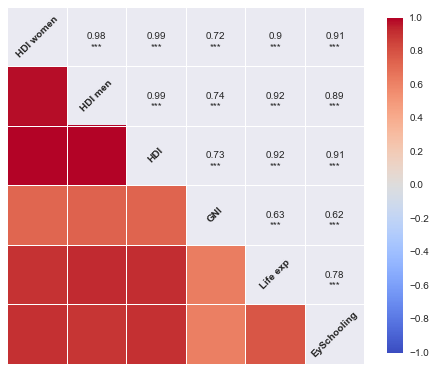

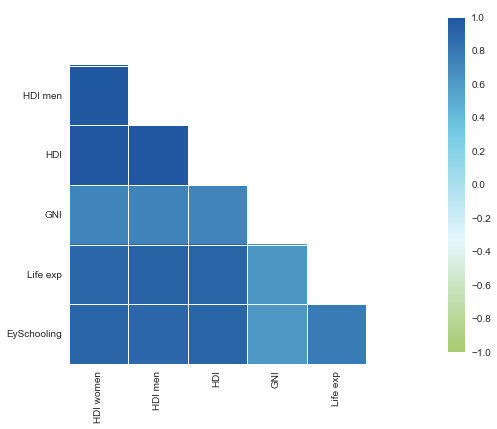

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

table3=table[['HDI women','HDI men','HDI','GNI','Life exp','EySchooling']]

sns.set(style="darkgrid")
sns.set_context(rc={"figure.figsize": (8, 8)})
sns.corrplot(table3)

#Another display
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#customized color
cmap = sns.blend_palette(["#a6ca6d", "#e5f6fc","#70c9e1","#2057a0"], as_cmap=True)

sns.corrplot(table3, annot=False, diag_names=False, cmap=cmap)
ax.grid(False);


##  <span style="color:#a6ca6d">4.2 Descriptive statistics: </span> <span style="color:#3972A0">Visualizing our dataset with seaborn heat map </span>

                                                HDI women   HDI men       HDI
Region                                                                       
East Asia & Pacific (all income levels)          0.727700  0.765000  0.751800
Europe & Central Asia (all income levels)        0.806818  0.822455  0.817159
Latin America & Caribbean (all income levels)    0.709773  0.732227  0.723955
Middle East & North Africa (all income levels)   0.696353  0.772765  0.746529
North America                                    0.902000  0.910500  0.908000
South Asia                                       0.533000  0.626429  0.591000
Sub-Saharan Africa (all income levels)           0.448371  0.510257  0.484571


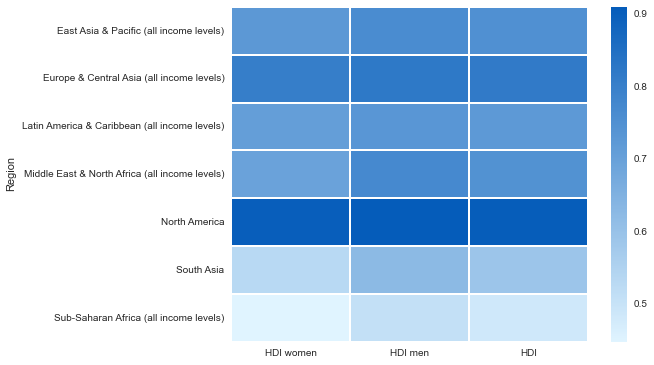

In [9]:
tableRegionPop=tableRegion[['HDI women','HDI men','HDI']]
print(tableRegionPop)

# Define the color set
color = sns.blend_palette(["#e0f4ff","#055cba"], as_cmap=True)

# Define figure size
sns.set_context(rc={"figure.figsize": (8, 6)}) 

sns.heatmap(tableRegionPop,cmap=color)

##  <span style="color:#a6ca6d">4.3 Econometrics: </span> <span style="color:#3972A0">Linear models with quantitative data <span style="color:#00acee"> &#9733; Seaborn &#9733; </span>


### <span style="color:#3972A0">Scatter plots & <span style="color:#00acee">linear regression adjustment curve</span>

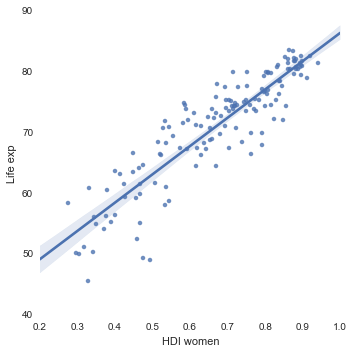

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


#Drawing a scatter plot
sns.lmplot('HDI women','Life exp', table)

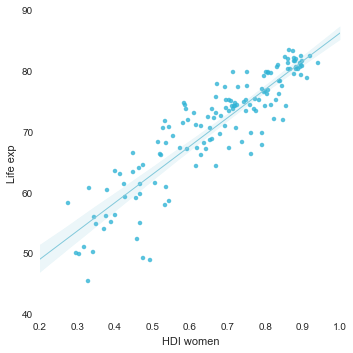

In [11]:
#with different options (color, etc.)
sns.lmplot('HDI women','Life exp', table, scatter_kws={"marker": ".", "color":"#30b3d5"}, line_kws={"linewidth": 1, "color": "#83c9db"});

### <span style="color:#3972A0">Scatter plot & marginal distributions ...</span>

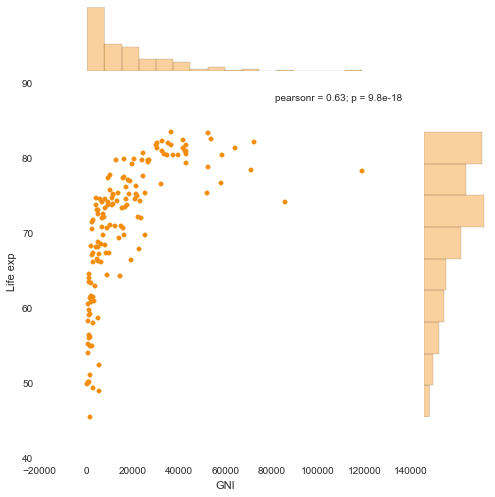

In [12]:
sns.jointplot('GNI','Life exp', table, color="#f48c0c", size=7);

### <span style="color:#3972A0">Scatter plot by categories ...</span>

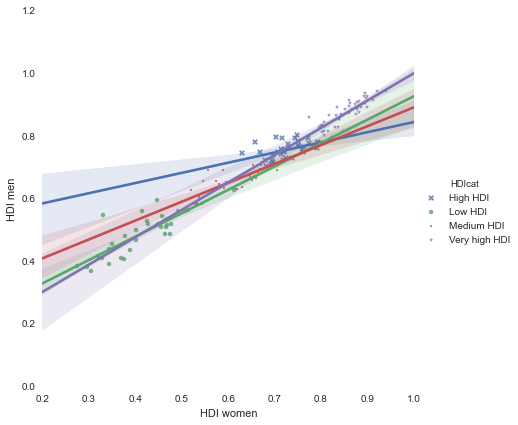

In [19]:
#using HDI categories (with option marker):

#On one single graph
sns.lmplot('HDI women','HDI men', table, hue="HDIcat", markers=["x", "o", ".", "*"], size=6)

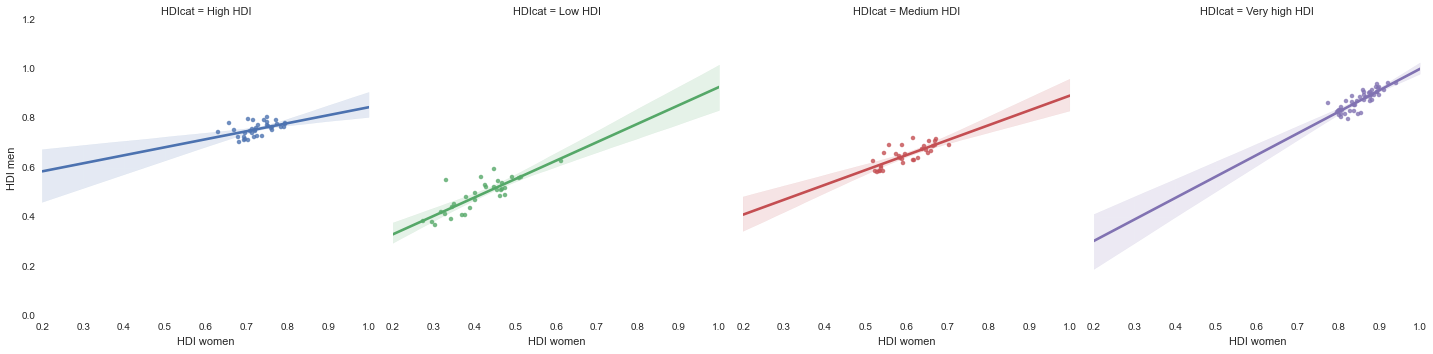

In [20]:
#Or on different graphs
sns.lmplot("HDI women", "HDI men", table, col="HDIcat", hue="HDIcat");

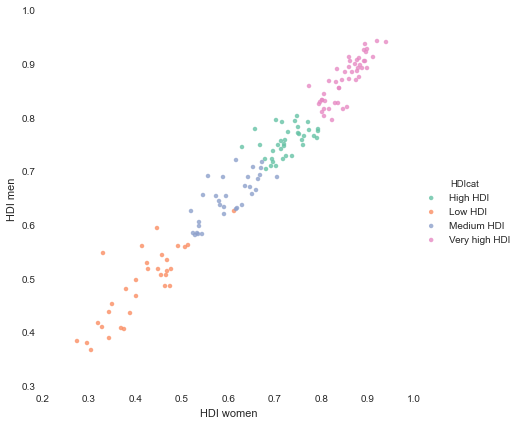

In [21]:
#Or without regression lines
sns.lmplot('HDI women','HDI men', table, hue="HDIcat", palette="Set2", fit_reg=False, size=6);

### <span style="color:#3972A0">2 variables regression: taking a look at the residuals ...</span>

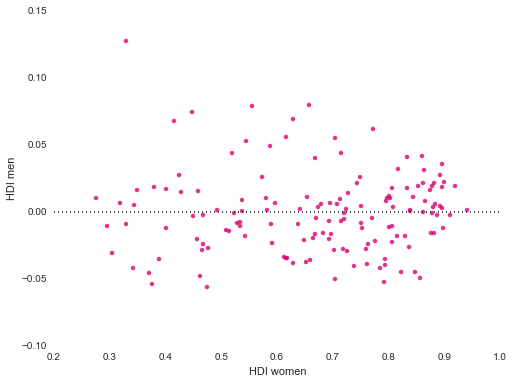

In [22]:
#Set size
sns.set_context(rc={"figure.figsize": (8, 6)}) 

#ploting the residuals
sns.residplot('HDI women','HDI men', table,  color="#db0171");

### <span style="color:#3972A0">Scatter plots & <span style="color:#00acee">quadratic or non linear regression adjustment curve</span>

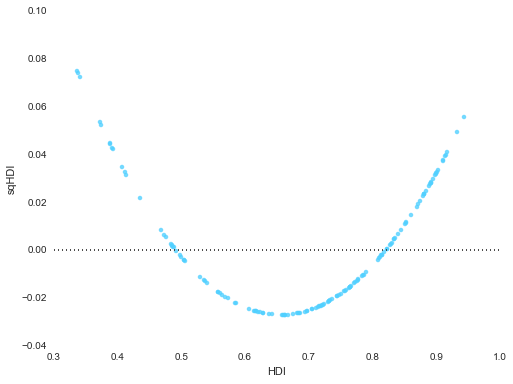

In [16]:
sqHDI=(table['HDI'] * table['HDI'])
tableNew = concat([table, sqHDI], axis=1, join='inner')
tableNew.columns = ['cname','Year','HDI women','HDI men','HDI','GNI','Life exp','Population','EySchooling','HDIcat','HDIclass','Region','sqHDI']


#Set size
sns.set_context(rc={"figure.figsize": (8, 6)}) 
sns.residplot('HDI','sqHDI',tableNew, color="#51d0ff");

##  <span style="color:#a6ca6d">4.3 Econometrics: </span> <span style="color:#3972A0">OLS with <span style="color:#00acee"> &#9733; statsmodels &#9733; </span>


In [19]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#Take a look at the table we have
#print(table.head())

#Add the log of Population
LogPop=np.log(table['Population'])
LogGNI=np.log(table['GNI'])
tableReg = concat([table, LogPop, LogGNI], axis=1, join='inner')
tableReg.columns = ['cname','Year','HDI women','HDI men','HDI','GNI','Life exp','Population','EySchooling','HDIcat','HDIclass','Region', 'LogPop', 'LogGNI'] 

# Define the model:
y=tableReg['HDI']
X=tableReg[['GNI','Life exp','EySchooling','LogPop']]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

#Print only a few information
print('Parameters: ', results.params)
print('R2: ', results.rsquared)
print('Standard errors: ', results.bse)
#print('Predicted values: ', results.predict())
#print('Residuals: ', results.resid)


                            OLS Regression Results                            
Dep. Variable:                    HDI   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.032e+04
Date:                Fri, 05 Jun 2015   Prob (F-statistic):          6.64e-175
Time:                        10:44:02   Log-Likelihood:                 257.33
No. Observations:                 147   AIC:                            -506.7
Df Residuals:                     143   BIC:                            -494.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
GNI          1.974e-06   2.25e-07      8.757      

### <span style="color:#3972A0">Take a look at the residuals ...</span>

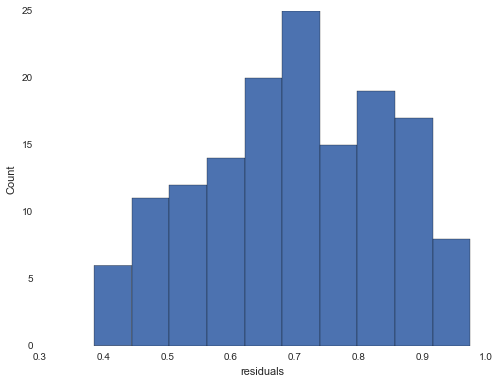

In [21]:
plt.hist(results.predict())
plt.ylabel('Count')
plt.xlabel('residuals')

### <span style="color:#3972A0">Playing with xkcd package...

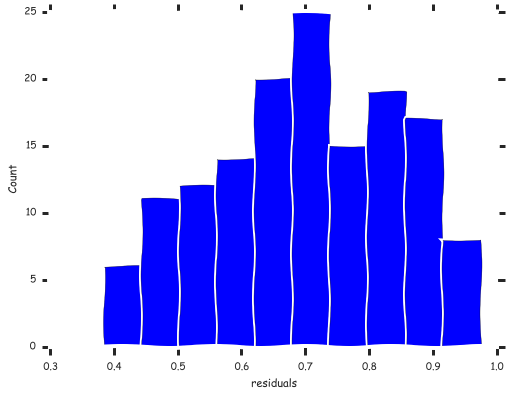

In [25]:
with plt.xkcd():
    plt.hist(results.predict())
    plt.ylabel('Count')
    plt.xlabel('residuals')

### <span style="color:#3972A0">Influence plots ...</span>

Influence plots show the (externally) studentized residuals vs. the leverage of each observation as measured by the hat matrix.
Externally studentized residuals are residuals that are scaled by their standard deviation where:

$var(\hat{\epsilon}_i)=\hat{\sigma}^2_i(1-h_{ii})$

with

$\hat{\sigma}^2_i=\frac{1}{n - p - 1 \;\;}\sum_{j}^{n} \forall  \ j \neq i$

\(n\) is the number of observations and \(p\) is the number of regressors. \(h_{ii}\) is the \(i\)-th diagonal element of the hat matrix
$H=X(X^{\;\prime}X)^{-1}X^{\;\prime}$

The influence of each point can be visualized by the criterion keyword argument. Options are Cook's distance and DFFITS, two measures of influence.

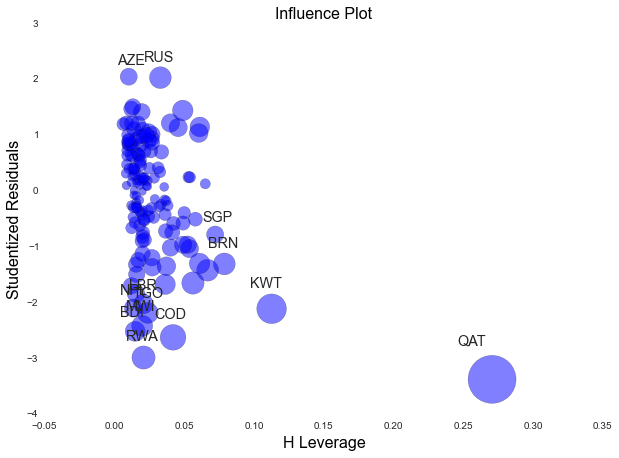

In [112]:
fig, ax = plt.subplots(figsize=(10,7),dpi=150) #facecolor='#eeeeee'
fig = sm.graphics.influence_plot(results, ax=ax, criterion="cooks", plot_alpha=0.5)

### <span style="color:#3972A0">Oberve the difference when using Log(GNI) ...</span>

In [22]:
y=tableReg['HDI']
X=tableReg[['Life exp','EySchooling','LogPop', 'LogGNI']]

model = sm.OLS(y, X)
results2 = model.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    HDI   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     8767.
Date:                Fri, 05 Jun 2015   Prob (F-statistic):          7.52e-170
Time:                        10:44:33   Log-Likelihood:                 245.36
No. Observations:                 147   AIC:                            -482.7
Df Residuals:                     143   BIC:                            -470.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Life exp        0.0018      0.001      2.386      

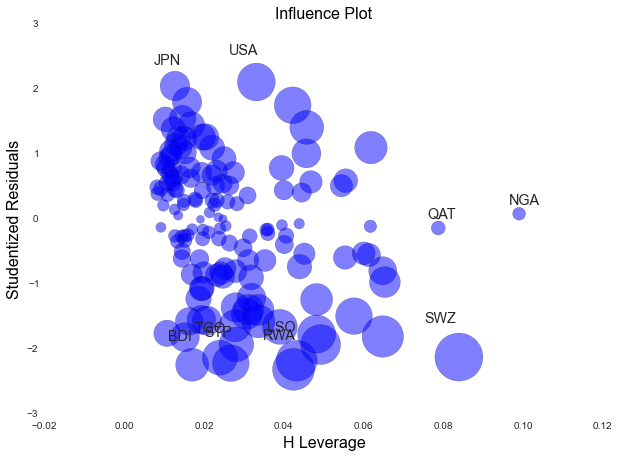

In [24]:
fig, ax = plt.subplots(figsize=(10,7),dpi=150) #facecolor='#eeeeee'
fig = sm.graphics.influence_plot(results2, ax=ax, criterion="cooks", plot_alpha=0.5)

---
##  <span style="color:#a6ca6d">5. Econometrics: </span> <span style="color:#3972A0">Panel data with<span style="color:#00acee"> &#9733; Pandas &#9733; </span>

### <span style="color:#3972A0">5.1 From HDRdata API to Panel data</span>

In [69]:
from pandas import Series, DataFrame, concat
import json
import numpy as np
randn = np.random.randn
from pandas import *
import pandas as pd

#=============================================================================================================
indicator_id1=str(137506)   # NB. HDI
indicator_id2=str(306)      # NB. Population
indicator_id3=str(141706)   # NB. GNI
indicator_id4=str(69206)    # NB. Life expectancy
indicator_id7=str(69706)    # NB. Expected Years of Schooling  

year=['2011','2012','2013']
list_ID=indicator_id1,indicator_id2,indicator_id3, indicator_id4 #Needs to have at least two indicator
#=============================================================================================================
yearlist= ','.join(year)
ID_l= ','.join(list_ID)

list_iso=['AFG','ALB','DZA','AND','AGO','ATG','AZE','ARG','AUS','AUT','BHS','BHR','BGD','ARM','BRB','BEL','BTN','BOL','BIH','BWA','BVT','BRA','BLZ','IOT','SLB','VGB','BRN','BGR','MMR','BDI','BLR','KHM','CMR','CAN','CPV','CYM','CAF','LKA','TCD','CHL','CHN','TWN','CXR','CCK','COL','COM','MYT','COG','COD','COK','CRI','HRV','CUB','CYP','CZE','BEN','DNK','DMA','DOM','ECU','SLV','GNQ','ETH','ERI','EST','FRO','FLK','SGS','FJI','FIN','ALA','FRA','GUF','PYF','ATF','DJI','GAB','GEO','GMB','PSE','DEU','GHA','GIB','KIR','GRC','GRL','GRD','GLP','GUM','GTM','GIN','GUY','HTI','HMD','VAT','HND','HKG','HUN','ISL','IND','IDN','IRN','IRQ','IRL','ISR','ITA','CIV','JAM','JPN','KAZ','JOR','KEN','PRK','KOR','KWT','KGZ','LAO','LBN','LSO','LVA','LBR','LBY','LIE','LTU','LUX','MAC','MDG','MWI','MYS','MDV','MLI','MLT','MTQ','MRT','MUS','MEX','MCO','MNG','MDA','MNE','MSR','MAR','MOZ','OMN','NAM','NRU','NPL','NLD','CUW','ABW','SXM','BES','NCL','VUT','NZL','NIC','NER','NGA','NIU','NFK','NOR','MNP','UMI','FSM','MHL','PLW','PAK','PAN','PNG','PRY','PER','PHL','PCN','POL','PRT','GNB','TLS','PRI','QAT','REU','ROU','RUS','RWA','BLM','SHN','KNA','AIA','LCA','MAF','SPM','VCT','SMR','STP','SAU','SEN','SRB','SYC','SLE','SGP','SVK','VNM','SVN','SOM','ZAF','ZWE','ESP','SSD','SDN','ESH','SUR','SJM','SWZ','SWE','CHE','SYR','TJK','THA','TGO','TKL','TON','TTO','ARE','TUN','TUR','TKM','TCA','TUV','UGA','UKR','MKD','EGY','GBR','GGY','JEY','IMN','TZA','USA','VIR','BFA','URY','UZB','VEN','WLF','WSM','YEM','ZMB','PSE']

l=len(list_iso) #record the lenght of the iso list
ly=len(year)    #record the lenght of the year list
lID=len(list_ID)

#------------------------- prepare the API request -------------------------
#Structure icy
url="http://ec2-52-1-168-42.compute-1.amazonaws.com/version/1/indicator_id/"+ID_l+"/year/"+yearlist+"?structure=icy"
print('API:',url)

#------------------------- Load the data with Pandas -----------------------
# load dataframe:
df=pd.read_json(url)

#load each serie : time serie by indicator and country (e.g. (indicator_X[AFG][2010,2011,2012,2013])
for ID in range (1,lID+1):
    for i in range (0,l):
        try:
            vars()['valueV'+str(ID)+'_'+str(i)]=np.array(Series(df['indicator_value'][vars()['indicator_id'+str(ID)]][list_iso[i]]).astype(np.float))
        except KeyError:
            vars()['valueV'+str(ID)+'_'+str(i)]=np.nan * np.ones(shape=(1,ly))  #fill a j long list with NaN     

            
#------------------------- Write the data  -----------------------
# writing first iteration ex. dataV1_0=valueV1_0, dataV2_0=valueV2_0, etc...
for ID in range (0,lID):
    ID=ID+1
    vars()['dataV'+str(ID)+'_0']=vars()['valueV'+str(ID)+'_0']

# Stack the observations (country on contry) by indicators
for ID in range (1,lID+1):
    for i in range (1,l):
        a=i-1
        vars()['dataV'+str(ID)+'_'+str(i)]=np.vstack((vars()['dataV'+str(ID)+'_'+str(a)],vars()['valueV'+str(ID)+'_'+str(i)]))

#------------------------- Set the panel  -----------------------
#set each indicator as a panel
for ID in range (1,lID+1):
    n=ID-1
    vars()['p'+str(ID)] = Panel(np.array([vars()['dataV'+str(ID)+'_'+str(l-1)]]), items=['Var'+str(ID)],major_axis=[list_iso],minor_axis=[year]).to_frame()

# Concatenate all indicators: [p1,p2.....p(LiD)]
#first iteration:
if lID>1: dataset=pandas.concat([p1,p2], axis=1, join='inner') #1st iteration p1,p2
#all other iteration:
for ID in range (3,lID+1):
    dataset=pandas.concat([dataset,vars()['p'+str(ID)]], axis=1, join='inner')                

#show the results
#print(dataset.head())

#set colomuns names
dataset.columns=['HDI','Pop','GNI','LifeExpc']

#show the results
print(dataset.head())

API: http://ec2-52-1-168-42.compute-1.amazonaws.com/version/1/indicator_id/137506,306,141706,69206/year/2011,2012,2013?structure=icy
               HDI      Pop   GNI  LifeExpc
major minor                                
AFG   2011   0.458  29105.5  1698      60.1
      2012   0.466  29824.5  1882      60.5
      2013   0.468  30551.7  1904      60.9
AGO   2011   0.521  20180.5  6271      51.1
      2012   0.524  20820.5  6259      51.5


In [42]:
#Add the log of Population
LogPop=np.log(dataset['Pop'])
LogGNI=np.log(dataset['GNI'])

dataset2 = concat([dataset, LogPop, LogGNI], axis=1, join='inner')
dataset2.columns = ['HDI','Pop','GNI','LifeExpc','LogPop','LogGNI'] 
print(dataset2.head())
dataset2.to_csv("Panel.csv")

               HDI      Pop   GNI  LifeExpc     LogPop    LogGNI
major minor                                                     
AFG   2011   0.458  29105.5  1698      60.1  10.278682  7.437206
      2012   0.466  29824.5  1882      60.5  10.303085  7.540090
      2013   0.468  30551.7  1904      60.9  10.327176  7.551712
AGO   2011   0.521  20180.5  6271      51.1   9.912472  8.743691
      2012   0.524  20820.5  6259      51.5   9.943693  8.741776


### <span style="color:#3972A0">5.2 Panel data analysis with Pandas</span>

In [60]:
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
from pandas.stats.plm import PanelOLS
from pandas.stats.ols import OLS, MovingOLS
from pandas.stats.plm import PanelOLS, MovingPanelOLS, NonPooledPanelOLS
from pandas.core.api import Series

#set the model
y=dataset2['HDI']
X=dataset2[['LogPop','LogGNI','LifeExpc']]

### <span style="color:#3972A0">5.2.1 Pooled OLS </span>

In [80]:
#Equivalent to Pooled OLS regression in Stata ?
reg = PanelOLS(y=y,x=X)
reg


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <LogPop> + <LogGNI> + <LifeExpc> + <intercept>

Number of Observations:         558
Number of Degrees of Freedom:   4

R-squared:         0.9493
Adj R-squared:     0.9490

Rmse:              0.0352

F-stat (3, 554):  3457.5571, p-value:     0.0000

Degrees of Freedom: model 3, resid 554

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
        LogPop    -0.0001     0.0007      -0.08     0.9341    -0.0015     0.0014
        LogGNI     0.0792     0.0021      38.33     0.0000     0.0752     0.0833
      LifeExpc     0.0072     0.0003      25.39     0.0000     0.0067     0.0078
     intercept    -0.5436     0.0145     -37.57     0.0000    -0.5720    -0.5153
---------------------------------End of Summary-

#### Comparison with Stata output for pooled ols: (*NB. same dataset*)

![Stata Output](http://www.stats4dev.com/Ipython/output1.png)

### <span style="color:#3972A0">5.2.2 Pannel data analysis: fixed effect </span>

In [79]:
#with time fixed effects (eq Stata xtreg y = x, fe)
regTime  = PanelOLS(y=y,x=X,time_effects=True)
regTime


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <LogPop> + <LogGNI> + <LifeExpc>

Number of Observations:         558
Number of Degrees of Freedom:   189

R-squared:         0.7905
Adj R-squared:     0.6837

Rmse:              0.0019

F-stat (3, 369):     7.4048, p-value:     0.0001

Degrees of Freedom: model 188, resid 369

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
        LogPop     0.0263     0.0080       3.28     0.0012     0.0106     0.0420
        LogGNI     0.0516     0.0020      25.36     0.0000     0.0476     0.0556
      LifeExpc     0.0046     0.0005       9.64     0.0000     0.0036     0.0055
---------------------------------End of Summary---------------------------------

#### Comparison with Stata output for pooled xtreg, fe: (*NB. same dataset*)

![Stata Output](http://www.stats4dev.com/Ipython/output2.png)

### <span style="color:#3972A0">5.2.3 Pannel data analysis: random effect </span>

In [62]:
#Random effects (eq Stata xtreg y = x, re)
regNoTime  = PanelOLS(y=y,x=X,time_effects=False)
regNoTime


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <LogPop> + <LogGNI> + <LifeExpc> + <intercept>

Number of Observations:         558
Number of Degrees of Freedom:   4

R-squared:         0.9493
Adj R-squared:     0.9490

Rmse:              0.0352

F-stat (3, 554):  3457.5571, p-value:     0.0000

Degrees of Freedom: model 3, resid 554

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
        LogPop    -0.0001     0.0007      -0.08     0.9341    -0.0015     0.0014
        LogGNI     0.0792     0.0021      38.33     0.0000     0.0752     0.0833
      LifeExpc     0.0072     0.0003      25.39     0.0000     0.0067     0.0078
     intercept    -0.5436     0.0145     -37.57     0.0000    -0.5720    -0.5153
---------------------------------End of Summary-

#### Comparison with Stata output for xtreg, re: (*nb. same dataset*)

![Stata Output](http://www.stats4dev.com/Ipython/output3.png)